## Currency Analysis

Here, we look at the exchange rates like USD/TRY, EUR/TRY and GBP/TRY for the last 10 years.

In [2]:
import os
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pjoin = os.path.join

In [6]:
# Pre-process raw CSV files

def clean_csv_file(csv_file_raw):
    '''Clean the input raw CSV file, write the contents into new CSV file.'''
    csv_file_clean = csv_file_raw.replace('/raw', '')
    with open(csv_file_raw, 'r') as f:
        with open(csv_file_clean, 'w+') as f_clean:
            for count, line in enumerate(f):
                # Clean extra quotes, get rid of first comma in date
                clean_line = line.replace('"', '')
                if count != 0:
                    clean_line = clean_line.replace(',','',1)
                f_clean.write(clean_line)
    print(f'Saved the cleaned format to: {csv_file_clean}')

raw_csv_files = [
    './data/currency/raw/USD_TRY_HistoricalData.csv',
    './data/currency/raw/EUR_TRY_HistoricalData.csv',
    './data/currency/raw/GBP_TRY_HistoricalData.csv'
]

for csv_file in raw_csv_files:
    clean_csv_file(csv_file)
    

Saved the cleaned format to: ./data/currency/USD_TRY_HistoricalData.csv
Saved the cleaned format to: ./data/currency/EUR_TRY_HistoricalData.csv
Saved the cleaned format to: ./data/currency/GBP_TRY_HistoricalData.csv


In [7]:
# Load CSV files into dataframes
data = {}
csv_files = {
    'USD' : './data/currency/USD_TRY_HistoricalData.csv',
    'EUR' : './data/currency/EUR_TRY_HistoricalData.csv',
    'GBP' : './data/currency/GBP_TRY_HistoricalData.csv'
}

for currency, csv_file in csv_files.items():
    df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
    # Reverse the dataframes (past to present time)
    df = df.iloc[::-1]
    data[currency] = df

# Take a look!
print(data['USD'].head())
print(data['EUR'].head())
print(data['GBP'].head())

             Price    Open    High    Low Change %
Date                                              
2010-02-07  1.5184  1.5245  1.5275  1.500   -0.69%
2010-02-14  1.5128  1.5084  1.5302  1.495   -0.37%
2010-02-21  1.5467  1.5065  1.5641  1.504    2.24%
2010-02-28  1.5382  1.5461  1.5535  1.527   -0.55%
2010-03-07  1.5288  1.5327  1.5435  1.520   -0.61%
             Price    Open    High     Low Change %
Date                                               
2010-02-07  2.0676  2.0883  2.0979  2.0486   -1.01%
2010-02-14  2.0599  2.0564  2.0837  2.0441   -0.37%
2010-02-21  2.1072  2.0601  2.1197  2.0442    2.30%
2010-02-28  2.0951  2.1052  2.1226  2.0627   -0.57%
2010-03-07  2.1040  2.0910  2.1109  2.0691    0.42%
             Price    Open    High     Low Change %
Date                                               
2010-02-07  2.3822  2.3828  2.3960  2.3381   -0.35%
2010-02-14  2.3408  2.3683  2.3898  2.3287   -1.74%
2010-02-21  2.3590  2.3381  2.4091  2.3247    0.78%
2010-02-28  2.3281 

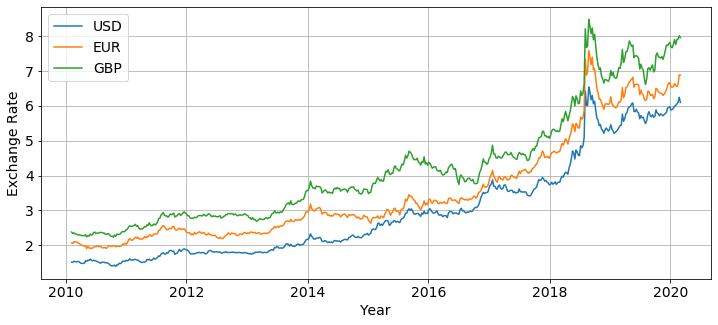

In [57]:
# Aesthetics
plt.rcParams.update({'font.size' : 14})

# Plot weekly prices as a function of time
fig, ax = plt.subplots(1,1,figsize=(12,5))
for currency, df in data.items():
    ax.plot(df['Price'], label=currency)
ax.legend(prop={'size': '14'})    
ax.set_xlabel('Year')
ax.set_ylabel('Exchange Rate')
ax.grid(True)

# Save figure
outdir = './fig/currency/'
if not os.path.exists(outdir):
    os.makedirs(outdir)

outpath = pjoin(outdir, 'exchange_rates.pdf')
fig.savefig(outpath)

## Study Case: 2018

We'll look at 2018 exchange rates here.

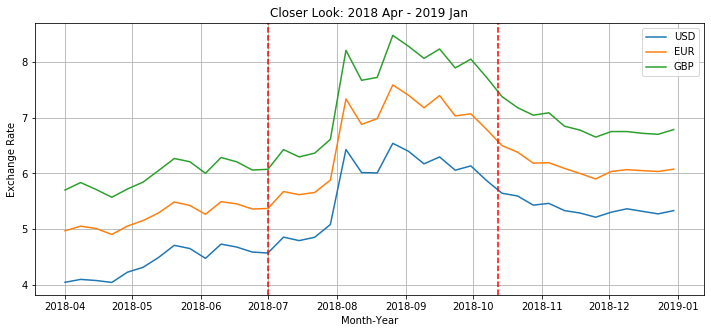

In [19]:
def plot_subset(data, start, end, title, critical_dates=[]):
    '''
    Plot and save the currency plots for specific subset of time.
    Start: Starting date, end: Ending date
    '''
    fig, ax = plt.subplots(1,1,figsize=(12,5))
    for currency, df in data.items():
        ax.plot(df['Price'].loc[start:end], label=currency)
    ax.legend()
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('Exchange Rate')
    ax.set_title(title)
    ax.grid(True)
    
    current_ylim = ax.get_ylim()
    # If requested plot critical dates
    for date in critical_dates:
        ax.plot([date, date], [ax.get_ylim()[0], ax.get_ylim()[1]], 'r--')
        # Prevent automatic offseting
        ax.set_ylim(current_ylim)
    
    # Save figure 
    outdir=f'./fig/currency/closer_look'
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    
    outpath = pjoin(outdir, f'{start}_{end}.pdf')
    fig.savefig(outpath)

# Plot the currencies as a function of time
# only from March 2018 to beginning of 2019 
plot_subset(data, start='2018-04-01', 
            end='2019-01-01', 
            title='Closer Look: 2018 Apr - 2019 Jan',
            critical_dates=[pd.Timestamp(year=2018, month=7, day=1), 
                            pd.Timestamp(year=2018, month=10, day=12)])